id 고유 id
hour 시간
temperature 기온
precipitation 비가 오지 않았으면 0, 비가 오면 1
windspeed 풍속(평균)
humidity 습도
visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
ozone 오존
pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
count 시간에 따른 따릉이 대여 수

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/train.csv')

df.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [41]:
df.shape

(1459, 11)

In [42]:
data_x = df.drop("count",axis=1).drop("id",axis=1).fillna(0)
data_x

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0
...,...,...,...,...,...,...,...,...,...
1454,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0
1455,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0
1456,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0
1457,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0


In [43]:
data_y = df["count"]
data_y

0        49.0
1       159.0
2        26.0
3        57.0
4       431.0
        ...  
1454     21.0
1455     20.0
1456     22.0
1457    216.0
1458    170.0
Name: count, Length: 1459, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.30, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 9)
(438, 9)
(1021,)
(438,)


In [45]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

slr = Ridge(alpha =5, random_state = 1)
poly = PolynomialFeatures(degree = 2, interaction_only = False, include_bias=True)
sc = StandardScaler()
pca = PCA(n_components = 7)

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)



In [46]:
poly.fit(X_train_pca)
lr_x=poly.transform(X_train_pca)
slr.fit(lr_x, y_train)
y_pred = slr.predict(lr_x)

In [47]:
lr_x

array([[ 1.00000000e+00,  1.09948212e-01, -7.00720353e-01, ...,
         2.66041200e-01, -5.85449659e-02,  1.28833919e-02],
       [ 1.00000000e+00, -2.66333728e+00, -9.39675149e-01, ...,
         2.37955455e-01, -1.83228861e-02,  1.41088657e-03],
       [ 1.00000000e+00, -1.95605537e+00,  1.50438353e+00, ...,
         1.97857598e-01,  3.50471137e-01,  6.20800107e-01],
       ...,
       [ 1.00000000e+00,  3.28661335e-01,  1.00820808e+00, ...,
         7.59407839e-02, -2.06080254e-03,  5.59239305e-05],
       [ 1.00000000e+00, -1.24021242e+00, -9.48428103e-01, ...,
         3.16450576e-03, -5.47255541e-03,  9.46399375e-03],
       [ 1.00000000e+00, -9.77350205e-01,  5.37933144e+00, ...,
         3.68753253e-01,  7.26315362e-01,  1.43058807e+00]])

In [48]:
slr.coef_

array([ 0.00000000e+00, -3.10460688e+01,  3.85209939e+00,  2.03570613e+01,
       -1.78298178e+01, -1.23644615e+01, -2.00945149e+01,  8.68805280e+00,
        4.33532872e+00, -1.41344672e+00, -2.62200367e+00,  9.11908894e+00,
        3.07227984e+00,  1.92432848e+00,  4.04630001e+00, -1.45656532e-02,
       -9.70064924e-01, -1.14801320e+00,  2.75280916e-02,  1.52003185e+00,
       -9.29035194e-01, -2.73261086e+00, -5.05245931e+00,  2.89699153e+00,
        8.02551338e-01, -2.30162574e+00, -1.53444872e+00,  3.70876543e+00,
        5.59060076e+00,  1.84448126e+00, -8.21768119e+00, -3.70051488e+00,
       -9.14629444e+00, -5.15873188e+00, -1.37915229e+00, -1.15548463e+00])

In [49]:
slr.intercept_

110.00706024952551

In [50]:
lr_test = poly.transform(X_test_pca)
y_predict = slr.predict(lr_test)
y_predict.shape

(438,)

In [51]:
result = pd.DataFrame({'Actual' : y_test.values.flatten(), 'Predicted' : y_predict})
result

,Actual,Predicted
0,134.0,154.992135
1,65.0,60.143337
2,67.0,44.675690
3,216.0,211.343597
4,80.0,36.918205
...,...,...
433,78.0,99.746153
434,12.0,28.625575
435,133.0,184.218101
436,90.0,12.653255


In [52]:
diff=(result['Actual'] - result['Predicted'])
SE = diff * diff.T
RMSE = SE.mean()**(1/2)
print("RMSE : %.2f"%RMSE)

RMSE : 46.21


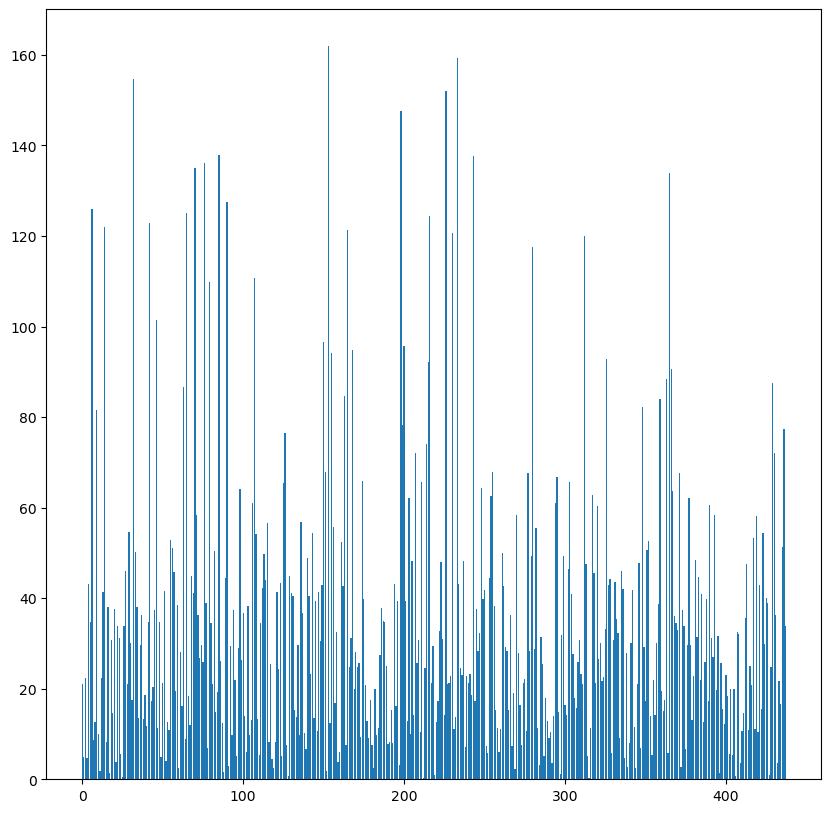

In [53]:
plt.figure(figsize = (10, 10))
#print(abs(diff))
plt.bar(range(len(diff)),abs(diff))

plt.savefig('그래프.png')
plt.show()

In [54]:
df_test = pd.read_csv('data/2020.AI.bike-test.csv').fillna(0).drop("id",axis=1)
result_predict = slr.predict(poly.transform(pca.transform(sc.transform(df_test))))
df_result = pd.DataFrame(columns = ['id','count'])
df_result["id"] = range(327)
df_result["count"] = result_predict

df_result.to_csv("result.csv", index = False)